## Perceptron


1. **Data** - It can work with Real valued inputs unlike MP Neuron which worked with only binary inputs. <br>
2. **Task**  - It can perform Classification tasks  - i.e. Boolean Output <br>
3. **Model** - <br><br>
$\Large{y}= \sum _{i=1}^{n} w_{i}\cdot x_{i}$ , where n= Total number of Features <br><br>
    &emsp;&emsp; a. Linear Model - Can only work well with linearly Separable data. <br>
    &emsp;&emsp; b. Parameters  - W, b <br>
    &emsp;&emsp; c. B is no more limited to fix set of values unlike MP Neuron. <br>
    &emsp;&emsp; d. Change in W, b can modify both the Slope as well as Intercepts. <br>
4. **Loss Function** - 0-1 Loss i.e. 1, if y not equals to y_pred. <br>
5. **Learning Algorithm**-  Perceptron Learning Algorithm


In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [6]:
data = pd.DataFrame(breast_cancer.data , columns=breast_cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data['class'] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [10]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [11]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#### One observation can be made here that the Mean value of all the Features for Class - 0 is always higher than Class-1 .

In [12]:
# Test Train Split
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop('class', axis=1)
Y = data['class']
type(X)

pandas.core.frame.DataFrame

In [14]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=1)

In [63]:
class Perceptron:

    def __init__(self) -> None:
        # b is scaler
        self.b = None
        # w is scaler and len(w)=num of features
        self.w = None

    def model(self, x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0
    
    def predict(self, X):
        y = []
        for x in X:
            y_pred = self.model(x)
            y.append(y_pred)
        return np.array(y)
    

    def plot_score_weights(self, accuracy):
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].plot(accuracy.values())
        axs[1].plot(self.w)
        axs[0].set_title("Accuracy Scores")
        axs[1].set_title("Weights")
        plt.tight_layout()
        plt.show()
    
    def fit(self,X,Y, epochs=1, lr =1):
        self.w = np.ones(X.shape[1])
        self.b= 0
        max_accuracy = 0
        accuracy = {}
        # Stores the Weight Vector after every Epoch
        weight_matrix = []
        for i in range(1,epochs+1):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y==1 and y_pred==0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr *1
                elif y==0 and y_pred==1:
                    self.w = self.w - lr *x
                    self.b = self.b + lr *1
            weight_matrix.append(self.w)
            accuracy[i] = accuracy_score(self.predict(X), Y)
            # Checkpointing the parameters whenever we encounter a better Accuracy Score
            if accuracy[i]>max_accuracy:
                max_accuracy=accuracy[i]
                check_w = self.w
                check_b = self.b
        
        self.w = check_w
        self.b = check_b
        self.plot_score_weights(accuracy)
        best_epoch = max(accuracy,key= accuracy.get)
        print("Best epoch is {} , Max accuracy is : {}".format(best_epoch, accuracy[best_epoch]))
        return np.array(weight_matrix)
        #print(accuracy)

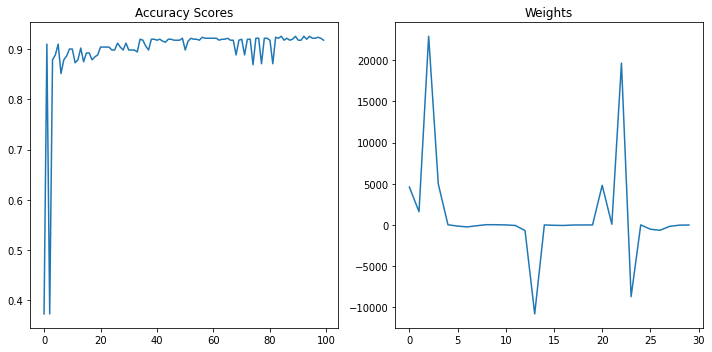

Best epoch is 85 , Max accuracy is : 0.92578125


In [73]:
perceptron = Perceptron()
weight_matrix = perceptron.fit(X_train.values, Y_train.values, epochs=100, lr=1)

#### Let's See how does Learning Rate impacts the Accuracy and Weights

Learning Rate = 0.001


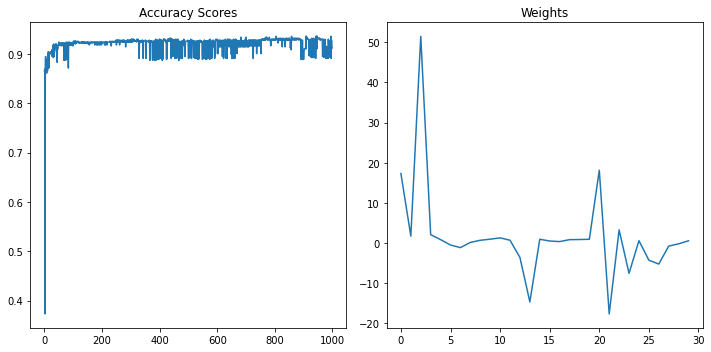

Best epoch is 806 , Max accuracy is : 0.935546875

Learning Rate = 0.01


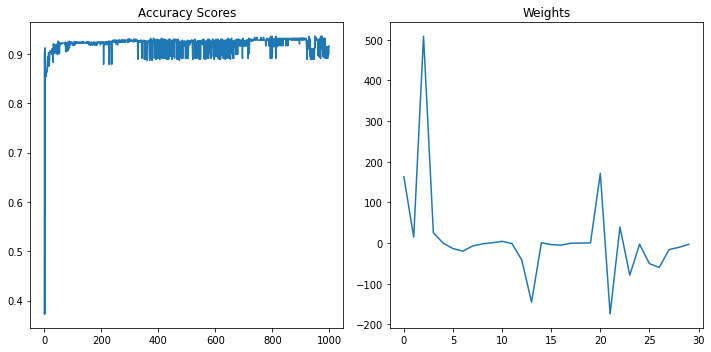

Best epoch is 795 , Max accuracy is : 0.935546875

Learning Rate = 0.1


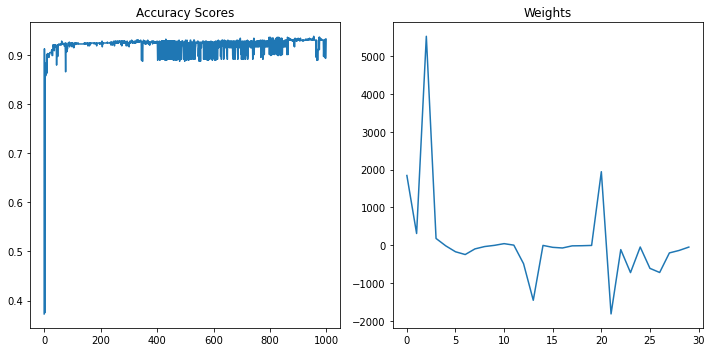

Best epoch is 956 , Max accuracy is : 0.9375

Learning Rate = 1


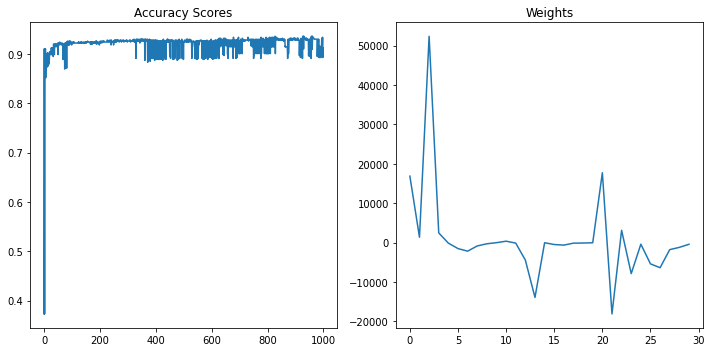

Best epoch is 828 , Max accuracy is : 0.935546875



In [70]:
learning_rates = [1,0.1,0.01, 0.001]
for lr in sorted(learning_rates, reverse=False):
    print("Learning Rate = {}".format(lr))
    perceptron = Perceptron()
    weight_matrix = perceptron.fit(X_train.values, Y_train.values, epochs=1000, lr=lr)
    print()


### Observations
* Different features have been weighted differently by the model. Weight Values close to 0 means that the features corressponding to these weights doesn't play much role in classifying a data point. For w=0 the w.x term for the corressponding feature becomes 0. Whereas features with extreme values plays a huge role.
* Evidently, when the Learning Rate is elevated, the weight values commence adopting significantly higher magnitudes. This observation can be confirmed by examining the update rule, in which the alteration in w is magnified by the learning rate factor.

In [28]:
y_train_preds = perceptron.predict(X_train.values)
accuracy = accuracy_score(Y_train.values, y_train_preds)
accuracy

0.947265625

In [29]:
y_test_preds = perceptron.predict(X_test.values)
accuracy = accuracy_score(Y_test.values, y_test_preds)
accuracy

0.9473684210526315

### Let's see how these weights have been learned during the model Training using some Animation

In [79]:
%matplotlib inline
%matplotlib notebook
%matplotlib notebook

from matplotlib import animation, rc
from IPython.display import HTML

In [80]:
weight_matrix.shape

(100, 30)

<IPython.core.display.Javascript object>


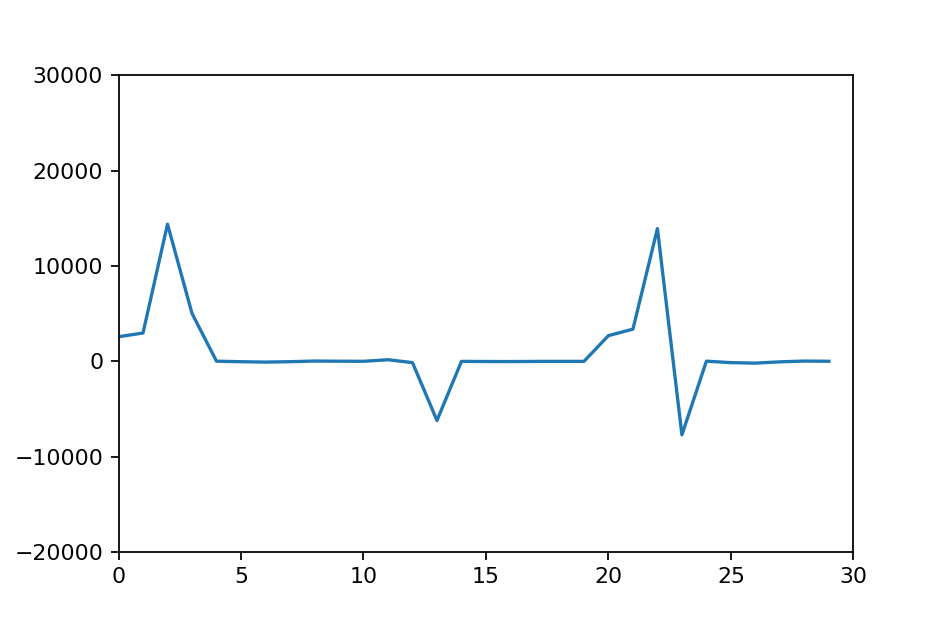

In [83]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
# animation function. This is called sequentially

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((0, weight_matrix.shape[1]))
ax.set_ylim((-20000, 30000))
line, = ax.plot([])

def animate(i):
    x = list(range(weight_matrix.shape[1]))
    y = weight_matrix[i,:]
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,frames=100, interval=200, blit=True)
HTML(anim.to_html5_video())


### Larger weights can lead to overfitting.